## Name: Indira Swaminathan <br> 
## Github Username = IndiraSwaminathan <br>
## USC ID: 4421-3513-31

In [1]:
#installing prettytable during execution
!pip install prettytable

In [2]:
#Importing all the required packages
import pandas as pd
import math
import numpy as np
from scipy.linalg import inv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable

## (1)(a) Download the Vertebral Column Data Set from: https://archive.ics.uci. edu/ml/datasets/Vertebral+Column.

In [3]:
#Defining file path
path = '../Data/vertebral_column_data/column_2C.dat'
column_names = ['incidence', 'tilt', 'angle', 'slope', 'radius', 'grade_SL','labels']
# reading data from csv and creating dataframe
df = pd.read_csv(path, delimiter=" ", names = column_names)

## (1)(b) Pre-Processing and Exploratory data analysis:

In [4]:
print(df.head())

   incidence   tilt  angle  slope  radius  grade_SL labels
0      63.03  22.55  39.61  40.48   98.67     -0.25     AB
1      39.06  10.06  25.02  29.00  114.41      4.56     AB
2      68.83  22.22  50.09  46.61  105.99     -3.53     AB
3      69.30  24.65  44.31  44.64  101.87     11.21     AB
4      49.71   9.65  28.32  40.06  108.17      7.92     AB


In [5]:
NO = (df[df["labels"]=="NO"])
AB = (df[df["labels"]=="AB"])

### i). Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

/Users/indiraswaminathan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


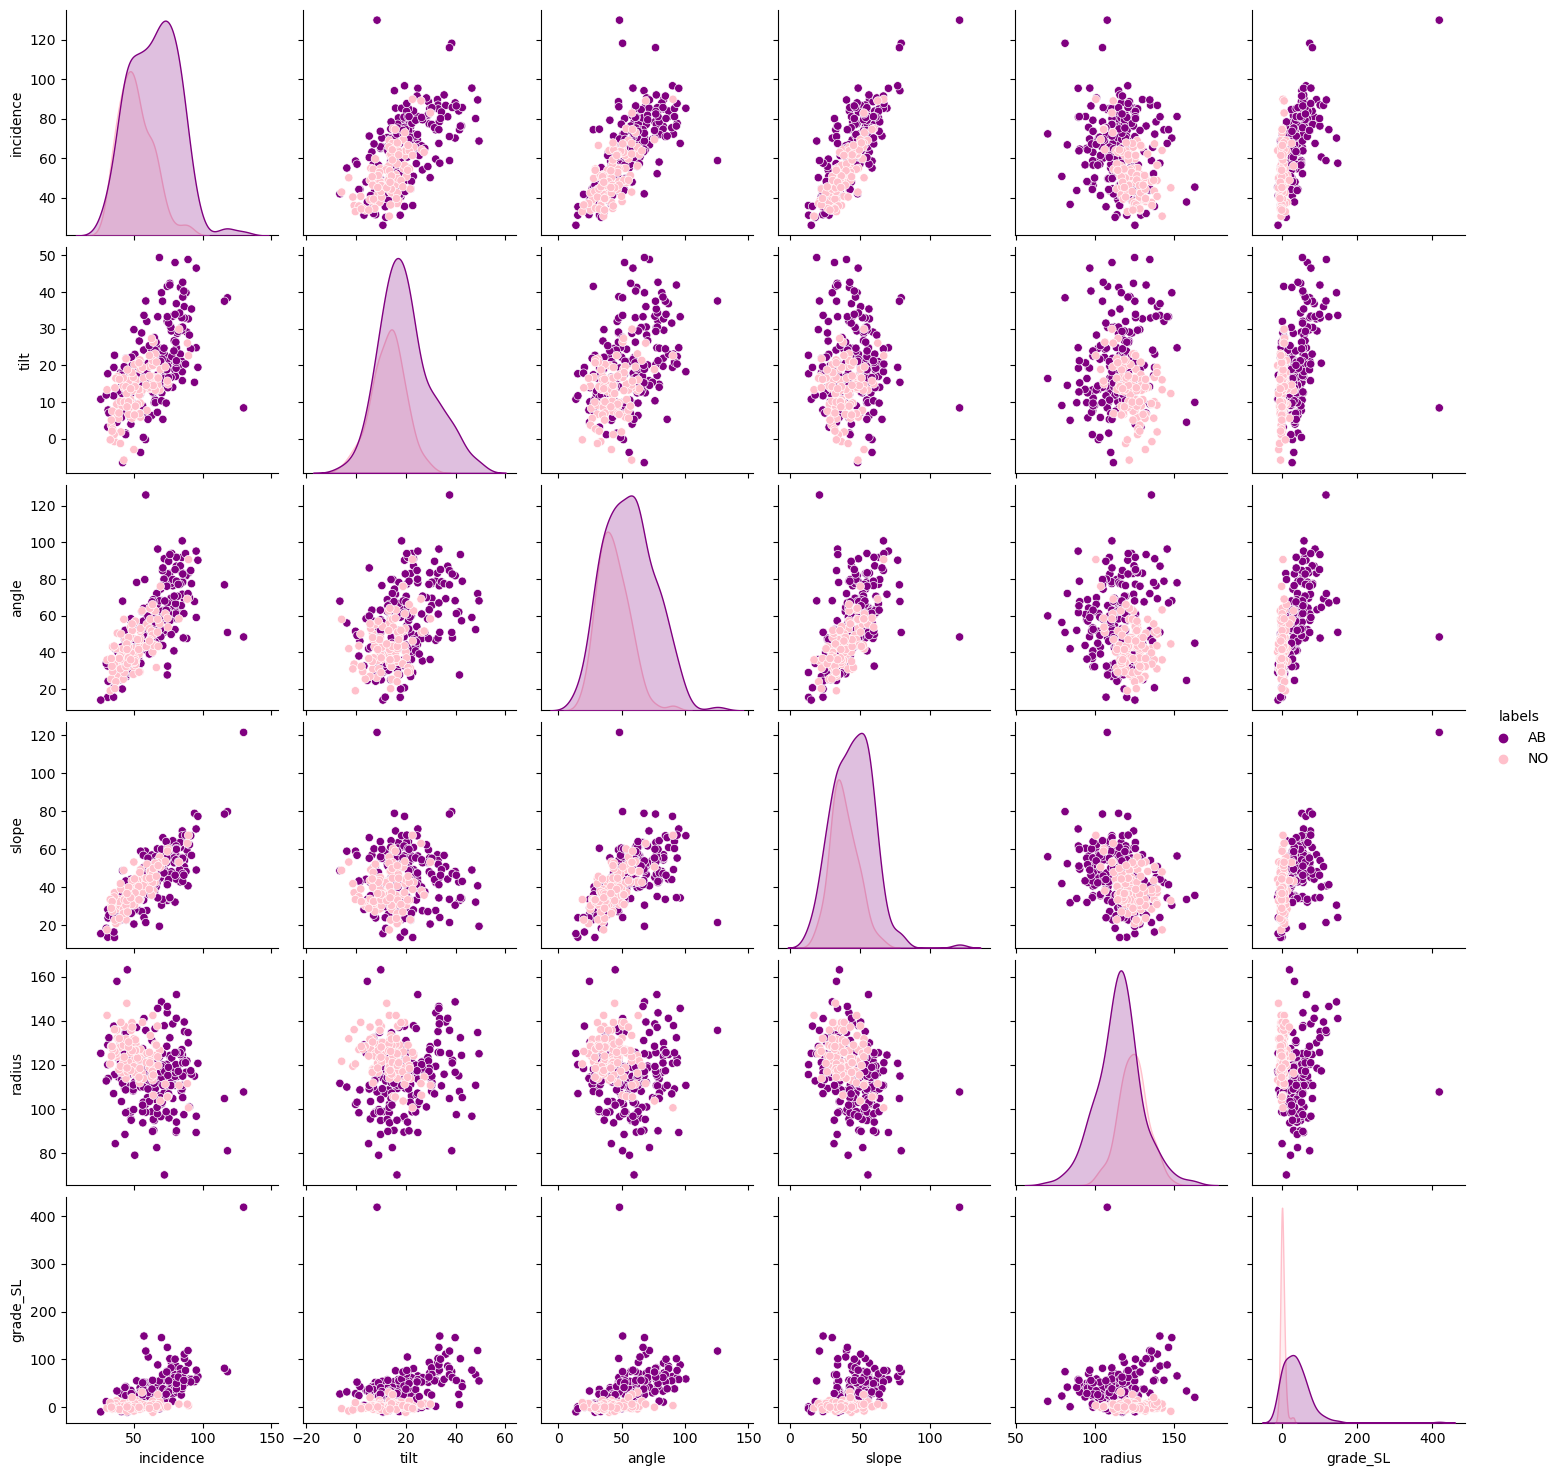

In [6]:
# initializing and defining scatterplot
sns.pairplot(data = df, hue='labels', palette = ['purple','pink'])
plt.show()

In [7]:
# replacing textual classification values with numeric values where AB = 1 and NO = 0
df.labels.replace(['AB', 'NO'], [1, 0], inplace=True)
df

,incidence,tilt,angle,slope,radius,grade_SL,labels
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


### ii). Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

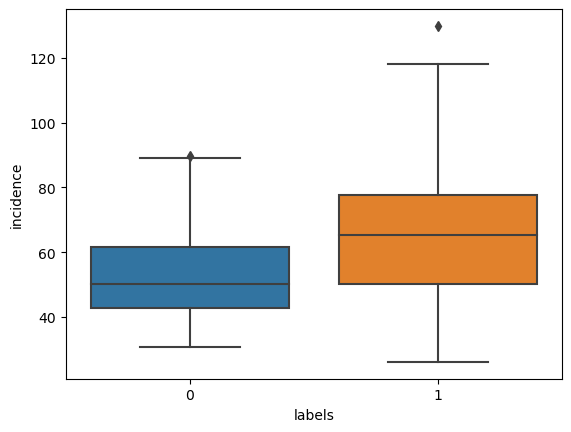

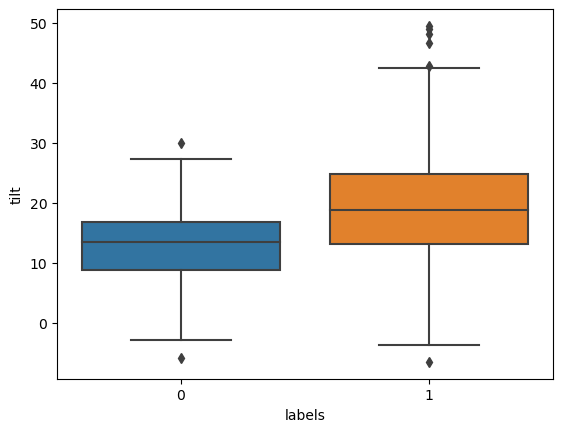

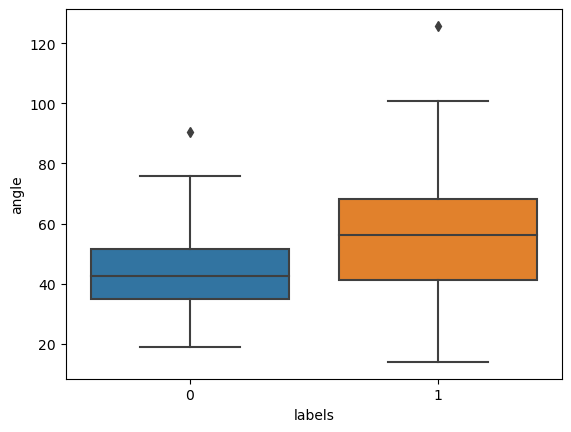

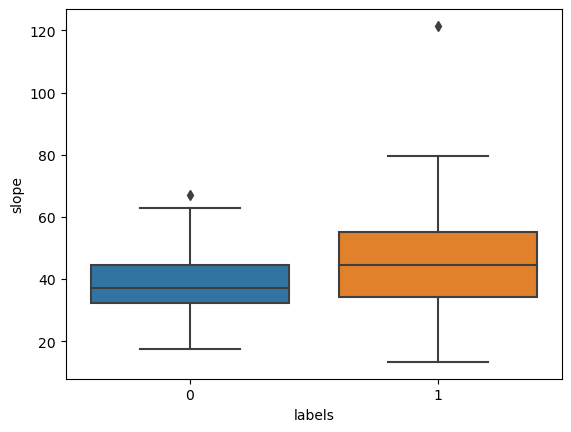

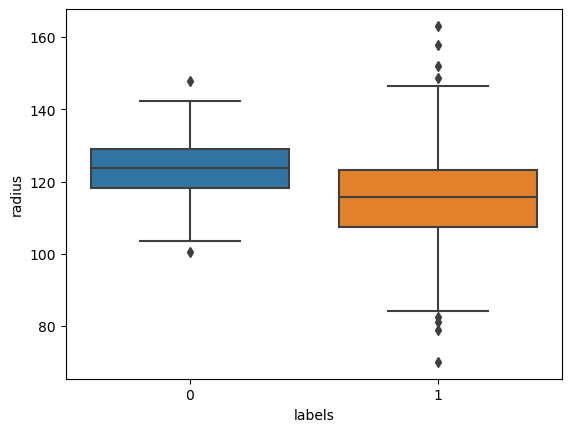

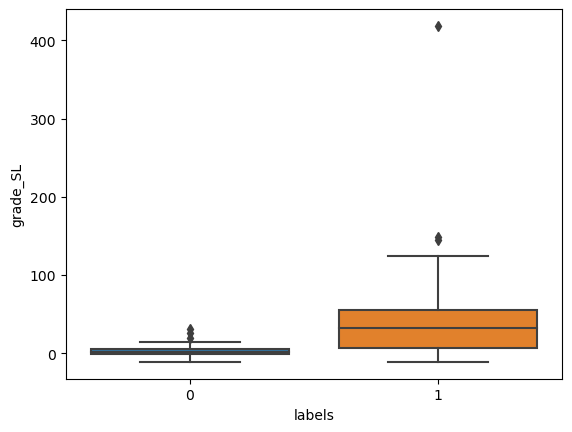

In [8]:
# initializing and defining boxplot
no_of_col = len(df.columns)
for i in range(0,no_of_col-1):
    sns.boxplot(data=df, x='labels',y=df.columns[i])
    plt.show()

### iii). Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [9]:
# bifurcating given dataset into training and testing dataset
training_Set = pd.concat([df[df["labels"] == 0].iloc[0:70, :], df[df["labels"] == 1].iloc[0:140, :]])
testing_Set = pd.concat([df[df["labels"] == 0].iloc[70:, :], df[df["labels"] == 1].iloc[140:, :]])

# separating training dataset into features and labels
y_train = training_Set['labels'];
X_train = training_Set.drop("labels",axis = 1)

# separating testing dataset into features and labels
y_test = testing_Set['labels'];
X_test = testing_Set.drop("labels",axis = 1)

#Printing the shape of the training and testing dataset
print("Original Dataframe Shape:", df.shape)
print("Training_Set_Shape: ",training_Set.shape)
print("Testing_Set_Shape: ", testing_Set.shape)

Original Dataframe Shape: (310, 7)
Training_Set_Shape:  (210, 7)
Testing_Set_Shape:  (100, 7)


## (c) Classification using KNN on Vertebral Column Data Set

### i). Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [10]:
# using sklearn's knn for training the model
classifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [11]:
Minimum_training_errors = []

### ii). Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.

In [12]:
training_errors = list()
Euclidean_minerr = 1
testing_errors = list()
for k in range(208,0,-3):
    KNN = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    KNN.fit(X_train.values,y_train)
    # calculating accuracy score for given value of k for training and testing
    # error = 1 - accuracy
    train_err = 1-accuracy_score(y_train, KNN.predict(X_train.values))
    test_err = 1-accuracy_score(y_test, KNN.predict(X_test.values))
    if test_err < Euclidean_minerr:
        Euclidean_minerr = round(test_err,2)
        Euclidean_best_k = k
    training_errors.append(train_err)
    testing_errors.append(test_err)
Minimum_training_errors.append(min(training_errors))

In [13]:
#Printing the minimum test error and the best k value of KNN using euclidean distance metric
print("Euclidean_minimum_error: ",end =" ")
print(Euclidean_minerr)
print("\nEuclidean_Best_k_value: ",end=" ")
print(Euclidean_best_k)

Euclidean_minimum_error:  0.06

Euclidean_Best_k_value:  4


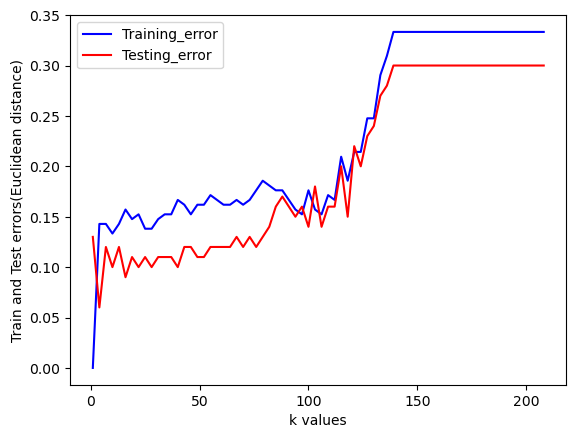

In [14]:
# for all values of k in the range, plotting a graph for train and test error_rate vs k_values using matplotlib
x = range(208, 0, -3)
plt.plot(x,training_errors,color = 'blue',label = 'Training_error')
plt.plot(x,testing_errors, color = 'red', label = 'Testing_error')
plt.xlabel('k values')
plt.ylabel('Train and Test errors(Euclidean distance)')
plt.legend()
plt.show()

In [15]:
KNN = KNeighborsClassifier(n_neighbors = Euclidean_best_k, metric = 'euclidean')
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
#Creating confusion matrix for the model
confusion_matrix_value = confusion_matrix(y_test, y_pred)

#True Positive and True negative error rate
True_Neg = confusion_matrix_value[0][0]
False_Pos = confusion_matrix_value[0][1]
False_Neg = confusion_matrix_value[1][0]
True_Pos = confusion_matrix_value[1][1]
True_pos_rate = True_Pos/(True_Pos+False_Neg)
True_neg_rate = True_Neg/(True_Neg+False_Pos)

#Precision and F1_Score
Precision = True_Pos/(True_Pos+False_Pos)
Recall = True_Pos/(True_Pos+False_Neg)
F1_Score = 2*(Precision*Recall)/(Precision+Recall)

print("Confusion Matrix")
CM_Table = PrettyTable(["Total Population", "Actual Positive", "Actual Negative"])
CM_Table.add_row(["Predicted Positive", True_Pos, False_Pos])
CM_Table.add_row(["Predicted Negative", False_Neg, True_Neg])
print(CM_Table)

print('True Positive Rate: ',round(True_pos_rate,2))
print('True Negative Rate: ',round(True_neg_rate,2))
print('True Positive: ',True_Pos)
print('True Negative: ',True_Neg)
print('False Negative: ',False_Neg)
print('False Positive: ',False_Pos)
print('Precision: ',round(Precision,2))
print('F1 Score: ',round(F1_Score,2))


Confusion Matrix
+--------------------+-----------------+-----------------+
|  Total Population  | Actual Positive | Actual Negative |
+--------------------+-----------------+-----------------+
| Predicted Positive |        69       |        5        |
| Predicted Negative |        1        |        25       |
+--------------------+-----------------+-----------------+
True Positive Rate:  0.99
True Negative Rate:  0.83
True Positive:  69
True Negative:  25
False Negative:  1
False Positive:  5
Precision:  0.93
F1 Score:  0.96


### iii). Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

In [16]:
best_test_err_list = []
best_test_k_list = []
err_df = pd.DataFrame()
Test_errors = []
k_list = []
Size_list = []

#For each size N, Finding the testing error for each k value
for N in range(10,211,10): #For each training set from the size range of {10,20,30,...,210}, best k_value and best_test_error are calculated
    Training = pd.concat([training_Set[training_Set['labels']== 0].iloc[0:N//3, :],training_Set[training_Set['labels']== 1].iloc[0:N-N//3, :]])
    #Size of training set is given as first ⌊N/3⌋ rows of Class 0 and N − ⌊N/3⌋ rows of Class 1
    y_train = Training['labels']
    X_train = Training.drop("labels",axis = 1)
    best_test_err = float("inf")
    for k in range(1,N,5):
        KNN = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        KNN.fit(X_train.values,y_train)
        y_pred = KNN.predict(X_test.values)
        test_error = 1 - accuracy_score(y_test, y_pred)
        if test_error<best_test_err: 
            best_test_err = test_error
            best_k_test = k
            
    Test_errors.append(round(best_test_err,2))
    k_list.append(best_k_test)
    Size_list.append(N)
    best_test_err_list.append(round(best_test_err,2))
    best_test_k_list.append(best_k_test)
    err_df = pd.DataFrame({
    'Best_Test_Error': Test_errors,
    'Best_Test_k': k_list,
    'Size': Size_list}) 
    

best_test_error_rate = round(min(best_test_err_list),2)
Loc = best_test_err_list.index(best_test_error_rate)
print(err_df)
best_k_val = best_test_k_list[Loc]
print("\nBest_Test_Error_rate: ",best_test_error_rate,"\nBest_k_value: ",best_k_val)

    Best_Test_Error  Best_Test_k  Size
0              0.25            1    10
1              0.20            6    20
2              0.22            1    30
3              0.25           11    40
4              0.30           26    50
5              0.29           21    60
6              0.29           26    70
7              0.29           31    80
8              0.29           41    90
9              0.25            6   100
10             0.22            6   110
11             0.17           16   120
12             0.16           16   130
13             0.15           16   140
14             0.13           16   150
15             0.13            6   160
16             0.13            6   170
17             0.10            6   180
18             0.09            6   190
19             0.09            6   200
20             0.08            6   210

Best_Test_Error_rate:  0.08 
Best_k_value:  6


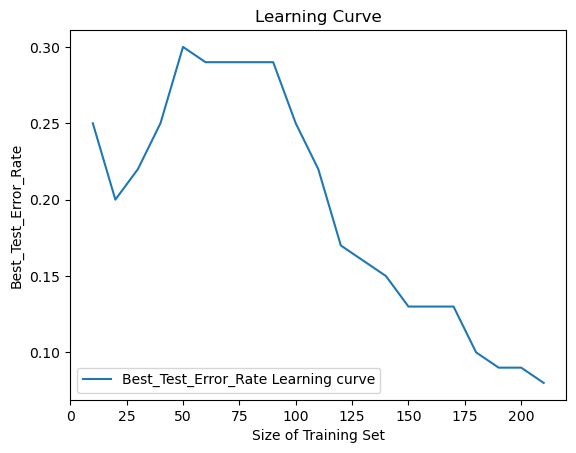

In [17]:
#Plotting the learning Curve - plotting best_test_error_rates vs training set size
x = range(10,211,10)
plt.title('Learning Curve')
plt.plot(x,best_test_err_list, label='Best_Test_Error_Rate Learning curve')
plt.xlabel('Size of Training Set')
plt.ylabel('Best_Test_Error_Rate')
plt.legend()
plt.show()

## (1)(d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

In [18]:
#Creating training and testing datasets and separating them as features and labels
y_train = training_Set['labels']
X_train = training_Set.drop('labels',axis = 1)
print(type(X_train),type(y_train))
y_test = testing_Set['labels']
X_test = testing_Set.drop('labels',axis = 1)
k_range = range(1,200,5)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


### i)Minkowski Distance:-
### A). which becomes Manhattan Distance with p = 1.

In [19]:
#Distance Metrics - Manhattan
inp_p = 1
inp_metrics = "minkowski"
Params_option = None
training_errors = []
mink_best_min_err = float("inf")

#Calculating train and test errors for each k value using Manhattan metric
for k in k_range:
        KNN = KNeighborsClassifier(n_neighbors = k, p = inp_p, metric = inp_metrics, metric_params = Params_option,weights="uniform")
        KNN.fit(X_train.values,y_train)
        train_err = 1-accuracy_score(y_train, KNN.predict(X_train.values))
        training_errors.append(train_err)
        test_error = 1 - accuracy_score(y_test,KNN.predict(X_test.values))
        if round(test_error,2) < mink_best_min_err and k!=1:
            mink_best_min_err = round(test_error,2)
            mink_best_k = k
#Printing the best_k value for which the test error rate was minimum for Manhattan metric
Minimum_training_errors.append(min(training_errors))
print("Minkowski_minimum_test_error_rate: ",mink_best_min_err,"\nMinkowski_Best_k_value: ",mink_best_k)

Minkowski_minimum_test_error_rate:  0.11 
Minkowski_Best_k_value:  6


### i)Minkowski Distance:- 
### B). with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [20]:
#Minkowski distance p_analysis 
y_train = training_Set['labels']
X_train = training_Set.drop('labels',axis = 1)
y_test = testing_Set['labels']
X_test = testing_Set.drop('labels',axis = 1)

best_min_err = float("inf")
count_p = 0.1

p_value_table = PrettyTable()
p_value_table.title = 'Summary of test_errors of log_10 p values'
p_value_table.field_names = ["p","log_10(p)", "Test_error"]

for p_val in np.logspace(0.1, 1, num=10):
    KNN = KNeighborsClassifier(n_neighbors = mink_best_k, p = p_val, metric = "minkowski", metric_params = None)
    KNN.fit(X_train.values,y_train)
    test_error = round(1 - accuracy_score(y_test,KNN.predict(X_test.values)),2)
    #print(round(test_error,2), round(p_val,2))
    
    p_value_table.add_row([round(count_p,2),round(p_val,2),test_error])
    count_p += 0.1
    
    if test_error < best_min_err:
        best_min_err = test_error
        best_p = round(p_val,2)
        
        
print(p_value_table)
base = 10
log_value = best_p
Best_log_p = math.log10(best_p)
print("Best_log_10 p-value: ",round(Best_log_p,2),"\np_val: ", best_p)

+-------------------------------------------+
| Summary of test_errors of log_10 p values |
+------+----------------+-------------------+
|  p   |   log_10(p)    |     Test_error    |
+------+----------------+-------------------+
| 0.1  |      1.26      |        0.09       |
| 0.2  |      1.58      |        0.09       |
| 0.3  |      2.0       |        0.08       |
| 0.4  |      2.51      |        0.08       |
| 0.5  |      3.16      |        0.08       |
| 0.6  |      3.98      |        0.06       |
| 0.7  |      5.01      |        0.07       |
| 0.8  |      6.31      |        0.08       |
| 0.9  |      7.94      |        0.09       |
| 1.0  |      10.0      |        0.09       |
+------+----------------+-------------------+
Best_log_10 p-value:  0.6 
p_val:  3.98


### i)Minkowski Distance:- 
### C). which becomes Chebyshev Distance with p → ∞

In [21]:
#Distance Metrics - chebyshev
inp_p = 1
inp_metrics = "chebyshev"
Params_option = None
training_errors = []
cheby_best_min_err = float("inf")

#Calculating train and test errors for each k value using chebyshev metric
for k in k_range:
        KNN = KNeighborsClassifier(n_neighbors = k, p = inp_p, metric = inp_metrics, metric_params = Params_option,weights="uniform")
        KNN.fit(X_train.values,y_train)
        train_err = 1-accuracy_score(y_train, KNN.predict(X_train.values))
        training_errors.append(train_err)
        test_error = 1 - accuracy_score(y_test,KNN.predict(X_test.values))
        if round(test_error,2) < cheby_best_min_err and k!=1:
            cheby_best_min_err = round(test_error,2)
            cheby_best_k = k
#Printing the best_k value for which the test error rate was minimum for chebyshev metric
Minimum_training_errors.append(min(training_errors))
print("Chebyshev_minimum_test_error_rate: ",cheby_best_min_err,"\nChebyshev_Best_k_value: ", cheby_best_k)

Chebyshev_minimum_test_error_rate:  0.08 
Chebyshev_Best_k_value:  16


### ii. Mahalanobis Distance.

In [22]:
#Distance Metrics - Mahalanobis
Params_option = {'VI': np.linalg.pinv(np.cov(X_train, bias=False, rowvar=False))}
Maha_best_min_err = float("inf")
training_errors = []
#Calculating train and test errors for each k value using Mahalanobis metric
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k,metric = "mahalanobis", metric_params = Params_option,weights="uniform")
    KNN.fit(X_train.values,y_train)
    train_err = 1-accuracy_score(y_train, KNN.predict(X_train.values))
    training_errors.append(train_err)
    test_error = 1 - accuracy_score(y_test,KNN.predict(X_test.values))
    if round(test_error,2) < Maha_best_min_err and k!=1:   #To avoid over-fitting of the model, k = 1 is not taken into consideration
        Maha_best_min_err = round(test_error,2)
        Maha_best_k = k
#Printing the best_k value for which the test error rate was minimum for Mahalanobis metric        
Minimum_training_errors.append(min(training_errors))           
print("Mahalanobis_minimum_test_error_rate: ",Maha_best_min_err,"\nMahalanobis_Best_k_value: ",Maha_best_k)

Mahalanobis_minimum_test_error_rate:  0.17 
Mahalanobis_Best_k_value:  6


In [23]:
#Printing the summarised table comprising of best k value and minimum test error of different distance metric used in KNN model with uniform weights
Uniform_Weighted_table = PrettyTable()
Uniform_Weighted_table.title = 'Summary of Weighted Voting'
Uniform_Weighted_table.field_names = ["Distance_Metric","Best_Test_Error", "Best_k_value"]
Uniform_Weighted_table.add_row(['Euclidean',Euclidean_minerr,Euclidean_best_k])
Uniform_Weighted_table.add_row(['Manhattan',mink_best_min_err,mink_best_k])
Uniform_Weighted_table.add_row(['Mahalanobis',Maha_best_min_err,Maha_best_k])
Uniform_Weighted_table.add_row(['Chebyshev',cheby_best_min_err,cheby_best_k])

print(Uniform_Weighted_table)

+--------------------------------------------------+
|            Summary of Weighted Voting            |
+-----------------+-----------------+--------------+
| Distance_Metric | Best_Test_Error | Best_k_value |
+-----------------+-----------------+--------------+
|    Euclidean    |       0.06      |      4       |
|    Manhattan    |       0.11      |      6       |
|   Mahalanobis   |       0.17      |      6       |
|    Chebyshev    |       0.08      |      16      |
+-----------------+-----------------+--------------+


## (1)(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [24]:
#Calculating minimum test error rate and optimum k value using weighted decision KNN
Distance_metric_list = ["manhattan", "chebyshev"]
Weighted_voting_table = PrettyTable()
Weighted_voting_table.title = 'Summary of Weighted Voting'
Weighted_voting_table.field_names = ["Distance_Metric","Best_Test_Error", "Best_k_value"]
p = 1
euc_min_err = float("inf")
Params_option = None
Euclidean_p = 2
k_range = range(1,200,5)
for metric in Distance_metric_list:
    best_min_err = float("inf")
    training_errors =[]
    for k in k_range:
        KNN = KNeighborsClassifier(n_neighbors = k,p = 1,metric = metric, metric_params = Params_option,weights="distance")
        KNN.fit(X_train.values,y_train)
        train_err = 1-accuracy_score(y_train, KNN.predict(X_train.values))
        training_errors.append(train_err)
        test_error = 1 - accuracy_score(y_test,KNN.predict(X_test.values))
        if round(test_error,2) < best_min_err and k!=1:   #To avoid over-fitting of the model, k = 1 is not taken into consideration
            best_min_err = round(test_error,2)
            best_k = k
    Minimum_training_errors.append(min(training_errors))
    Weighted_voting_table.add_row([metric,round(best_min_err,2),best_k])
    
training_errors =[]
for k in k_range:
        KNN = KNeighborsClassifier(n_neighbors = k,p=2, metric = "euclidean", metric_params = Params_option,weights="distance")
        KNN.fit(X_train.values,y_train)
        train_err = 1-accuracy_score(y_train, KNN.predict(X_train.values))
        training_errors.append(train_err)
        test_error = 1 - accuracy_score(y_test,KNN.predict(X_test.values))
        if round(test_error,2) < euc_min_err and k!=1:   #To avoid over-fitting of the model, k = 1 is not taken into consideration
            euc_min_err = round(test_error,2)
            euc_best_k = k
Minimum_training_errors.append(min(training_errors))
Weighted_voting_table.add_row(['Euclidean',round(euc_min_err,2),euc_best_k])
#Printing the summarised table comprising of best k value and minimum test error of different distance metric used in KNN model with distance weights
print(Weighted_voting_table)

+--------------------------------------------------+
|            Summary of Weighted Voting            |
+-----------------+-----------------+--------------+
| Distance_Metric | Best_Test_Error | Best_k_value |
+-----------------+-----------------+--------------+
|    manhattan    |       0.1       |      26      |
|    chebyshev    |       0.11      |      16      |
|    Euclidean    |       0.1       |      6       |
+-----------------+-----------------+--------------+


## (1)(f) What is the lowest training error rate you achieved in this homework?

In [25]:
print("The minimum training error achieved is: ",min(Minimum_training_errors))

The minimum training error achieved is:  0.0


The lowest training error rate I achieved in this homework is 0.0 while using k-Nearest Neighbors Classifier model